In [1]:
import os
from tensorflow.keras.models import load_model

# Corrigir o caminho para o modelo salvo
save_path = '../RedesNeuraisMalha/network.h5'

# Carregar o modelo salvo
model = load_model(save_path)

print("Modelo carregado com sucesso!")



Modelo carregado com sucesso!


In [2]:
model.weights

[<Variable path=sequential/dense/kernel, shape=(166, 200), dtype=float32, value=[[-0.01623466 -0.00368791 -0.12735087 ...  0.00184164  0.06137986
   -0.0487233 ]
  [ 0.04936419  0.10798398  0.06242044 ... -0.09961444  0.12687197
    0.01246908]
  [-0.12583463 -0.05203516  0.06633073 ... -0.10226316 -0.02433463
   -0.1275311 ]
  ...
  [-0.04355982  0.08984686  0.03746744 ... -0.02448565 -0.08838801
   -0.11015038]
  [-0.03845081  0.04944942 -0.07767808 ... -0.0503767  -0.11171351
   -0.10202952]
  [-0.10702802  0.08935931 -0.04996548 ... -0.07306359 -0.0859504
    0.05806443]]>,
 <Variable path=sequential/dense/bias, shape=(200,), dtype=float32, value=[ 0.          0.01826936  0.          0.         -0.00891028  0.01508765
   0.00247397 -0.00846517  0.02003094  0.01719785  0.          0.02074105
   0.          0.          0.01660541  0.         -0.01099627  0.02028712
   0.          0.021167    0.01899536  0.00696104  0.          0.
   0.          0.02133972  0.          0.          0.0

Número de camadas: 4
Número de neurônios por camada: [200, 40, 20, 2]


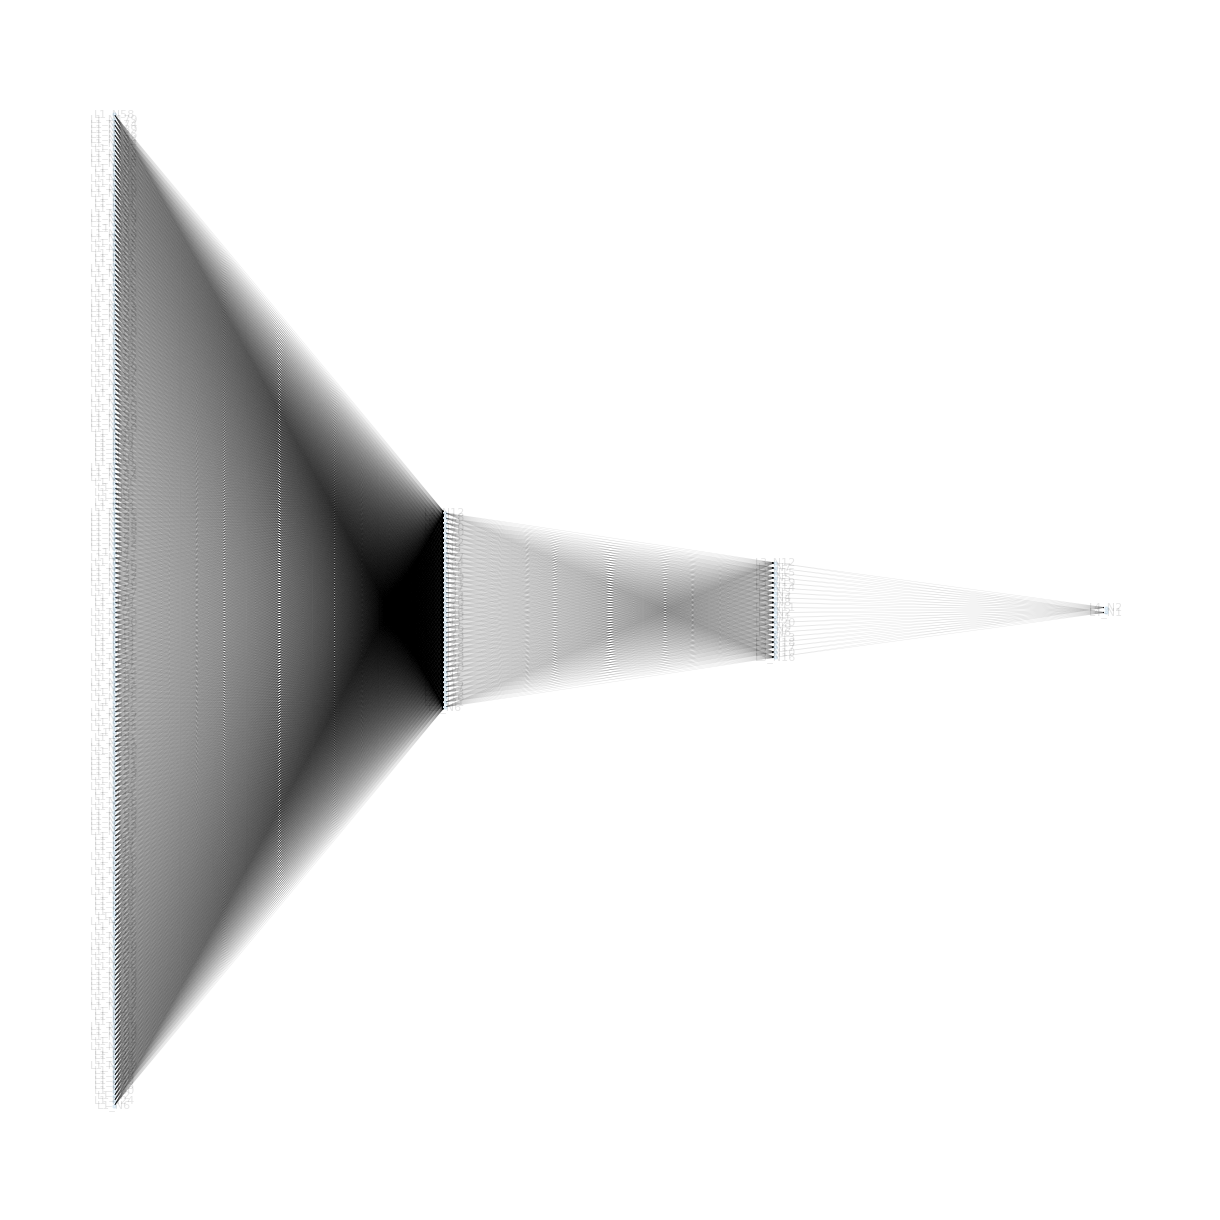

In [6]:
import networkx as nx

import matplotlib.pyplot as plt

# Extrair número de camadas e número de neurônios por camada
num_layers = len(model.layers)
layers = model.layers
neurons_per_layer = []
for layer in layers:
    if hasattr(layer, 'units'):
        neurons_per_layer.append(layer.units)
    elif hasattr(layer, 'output_shape'):
        neurons_per_layer.append(layer.output_shape[-1])
    else:
        neurons_per_layer.append('?')

print(f"Número de camadas: {num_layers}")
print(f"Número de neurônios por camada: {neurons_per_layer}")

# Construir grafo das conexões
G = nx.DiGraph()
layer_labels = []

# Adiciona nós para cada neurônio em cada camada
for idx, n_neurons in enumerate(neurons_per_layer):
    for n in range(n_neurons):
        node_name = f"L{idx+1}_N{n+1}"
        G.add_node(node_name, layer=idx)
        layer_labels.append(node_name)

# Adiciona arestas entre neurônios de camadas consecutivas
for idx in range(num_layers - 1):
    for n1 in range(neurons_per_layer[idx]):
        for n2 in range(neurons_per_layer[idx+1]):
            G.add_edge(f"L{idx+1}_N{n1+1}", f"L{idx+2}_N{n2+1}")

# Visualizar o grafo com linhas mais finas e transparentes
plt.figure(figsize=(12, 12))
pos = nx.multipartite_layout(G, subset_key="layer")
nx.draw(
    G, 
    pos, 
    with_labels=True, 
    node_size=5, 
    font_size=8, 
    arrowsize=1, 
    alpha=0.1,  # Transparência das arestas
    width=0.3   # Espessura das arestas
)
plt.show()